## Use PyTorch autograd and gradient descent for linear regression
* create a synthetic dataset with 100 data points

In [21]:
import torch as pt
pt.manual_seed(0)

X = pt.linspace(-5, 5, 100)
y = 2 * X + pt.normal(0., 10., [len(X)])

## Render a scatter plot of the sample data
* remember to import `matplotlib.pyplot as plt` and set `%matplotlib inline`

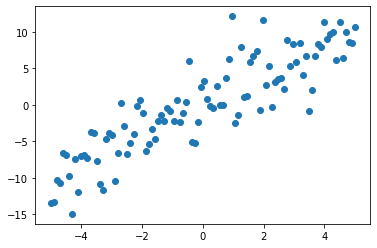

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y);

## Initialize the model parameter
* **hint:** don't forget to set `requires_grad = True`

In [23]:
w1 = pt.randn(1, requires_grad = True)
b1 = pt.randn(1, requires_grad = True)
w2 = pt.randn(1, requires_grad = True)
b2 = pt.randn(1, requires_grad = True)
parameters = (w1, b1, w2, b2)

## Implement a `forward` method that returns the predicted values

In [24]:
def forward(parameters, X):
    w1, b1, w2, b2 = parameters
    z = w1 * X + b1
    # if we had an act function -> a = act(z)
    return w2 * z + b2 # -> act(w2*a + b2)

## Implement a `loss` method that returns the mean squared error
* **hint:** use the `pt.mean` method

In [25]:
def loss(y_pred, y):
    return pt.mean((y_pred - y) ** 2)

In [26]:
def optimizer(parameter, lr):
  parameter.data -= (lr * parameter.grad)
  parameter.grad = None
  return parameter

In [27]:
LEARNING_RATE = 0.003

for _ in range(100):
    y_pred = forward(parameters, X)
    mse = loss(y_pred, y)
    
    mse.backward(pt.tensor(1.))
    w1, b1, w2, b2 = parameters
    cache = []
    for parameter in parameters:
      parameter =  optimizer(parameter, LEARNING_RATE)
      cache.append(parameter)
    parameters = cache[0], cache[1], cache[2], cache[3]
    print("MSE: ", mse.item(), " parameters: ", parameters)

MSE:  57.51349639892578  parameters:  (tensor([1.2887], requires_grad=True), tensor([0.0367], requires_grad=True), tensor([-0.1245], requires_grad=True), tensor([-0.1319], requires_grad=True))
MSE:  49.15739440917969  parameters:  (tensor([1.2750], requires_grad=True), tensor([0.0365], requires_grad=True), tensor([0.0175], requires_grad=True), tensor([-0.1304], requires_grad=True))
MSE:  42.72670364379883  parameters:  (tensor([1.2767], requires_grad=True), tensor([0.0365], requires_grad=True), tensor([0.1462], requires_grad=True), tensor([-0.1290], requires_grad=True))
MSE:  37.43257141113281  parameters:  (tensor([1.2902], requires_grad=True), tensor([0.0367], requires_grad=True), tensor([0.2643], requires_grad=True), tensor([-0.1276], requires_grad=True))
MSE:  32.8753547668457  parameters:  (tensor([1.3126], requires_grad=True), tensor([0.0371], requires_grad=True), tensor([0.3735], requires_grad=True), tensor([-0.1262], requires_grad=True))
MSE:  28.854642868041992  parameters:  (

## Render a plot of the sample data with a line based on your model parameter
* use `detach().numpy()` on the tensor generated by your model to render it
* **hint:** reuse your `forward` function to generate the values for the line plot


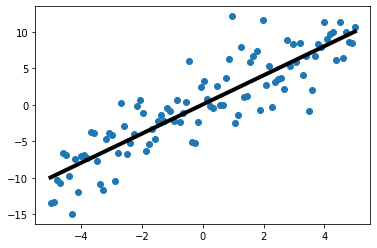

In [28]:
plt.scatter(X, y)

y_pred = forward(parameters, X).detach().numpy()
plt.plot(X, y_pred, color='black', linewidth = 4);

Copyright 2021 CounterFactual.AI LLC. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.